In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = "../out/airline_cs/random_forest_classifier.csv"
df = pd.read_csv(path)

## Save plots

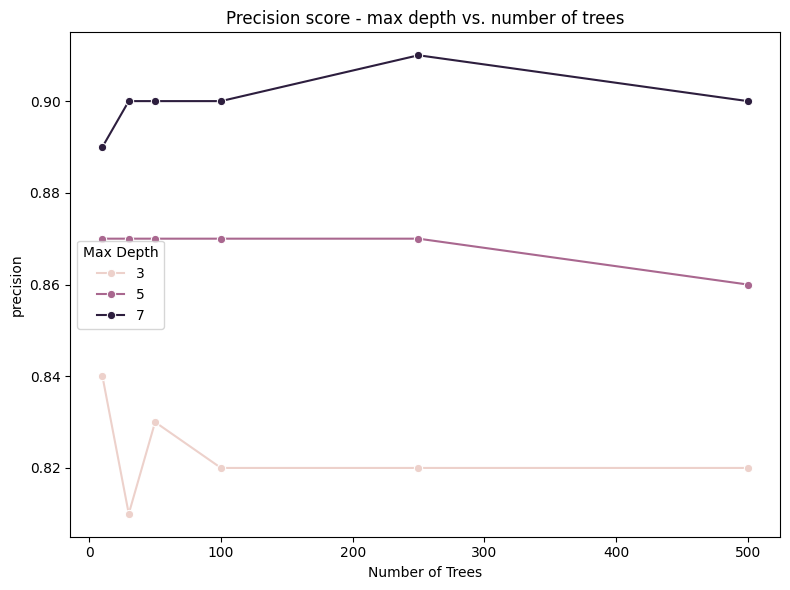

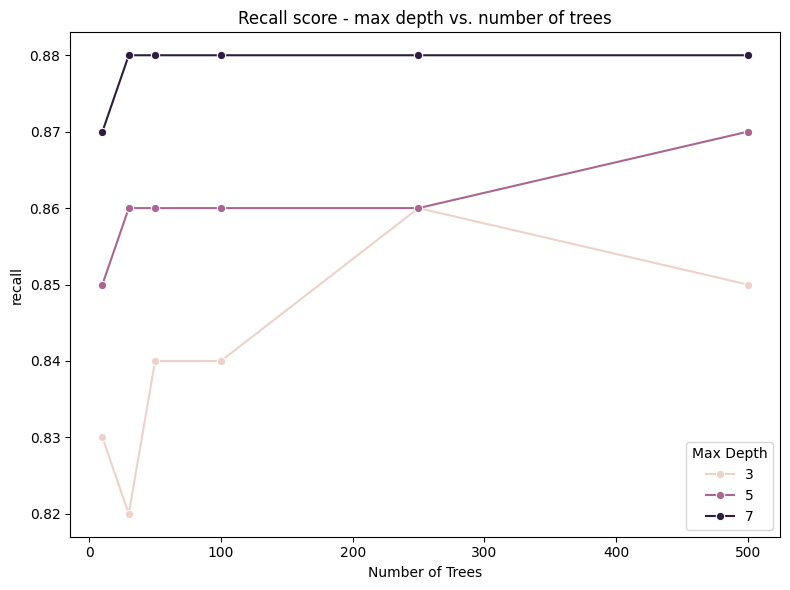

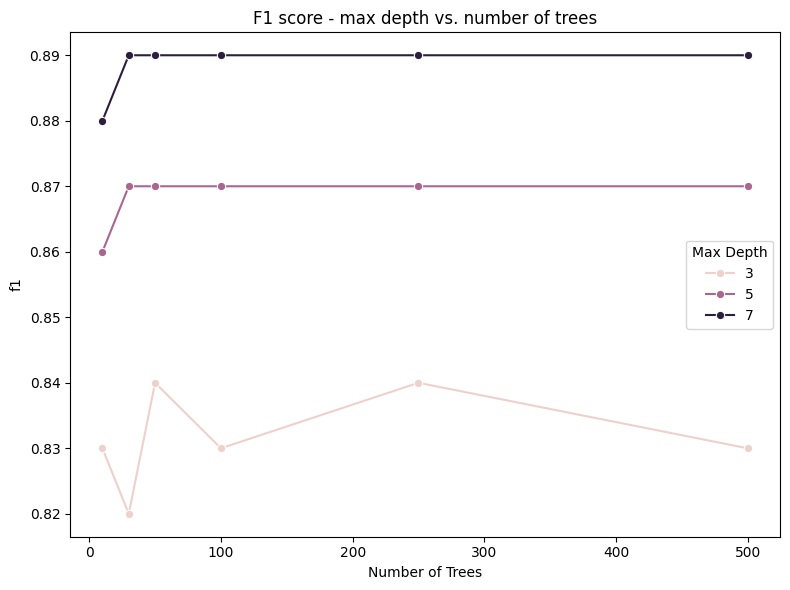

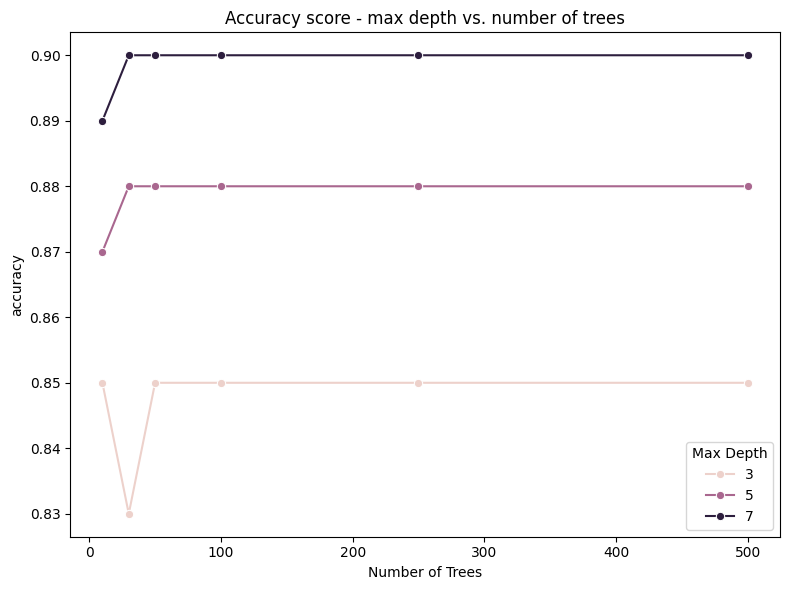

In [4]:
scores = ["precision", "recall", "f1", "accuracy"]
labels = ["Precision", "Recall", "F1", "Accuracy"]

for score, label in zip(scores, labels): 
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111)
    #  = plt.plot( figsize=(8, 6))

    sns.lineplot(ax=ax, data=df.round(2), x="n_trees", y=score, hue="max_depth", marker="o")
    ax.set_title(f"{label} score - max depth vs. number of trees")
    ax.set_xlabel("Number of Trees")
    ax.set_ylabel(score)
    ax.legend(title="Max Depth")

    plt.tight_layout()
    plt.savefig(f"../out/airline_cs/random_forest_classifier_{score}.png")

In [5]:
path = "../out/airline_cs/tournament_forest_classifier.csv"
df = pd.read_csv(path)

In [6]:
tournament_sizes = df["tournament_size"].unique()

for t_size in tournament_sizes:
    tournamnet_df= df[df["tournament_size"] == t_size].round(2)

    table = tournamnet_df.pivot_table(index='max_depth', columns='n_trees', values=['accuracy'])
    print(table)

          accuracy                              
n_trees        10    30    50    100   250   500
max_depth                                       
3             0.58  0.66  0.61  0.64  0.64   NaN
5             0.74  0.73  0.75  0.73  0.73   NaN
7             0.78  0.79  0.79  0.80  0.80  0.79
          accuracy                              
n_trees        10    30    50    100   250   500
max_depth                                       
3             0.71  0.74  0.68  0.72  0.70   NaN
5             0.76  0.79  0.77  0.79  0.79   NaN
7             0.77  0.81  0.81  0.81  0.83  0.83
          accuracy                              
n_trees        10    30    50    100   250   500
max_depth                                       
3             0.75  0.68  0.71  0.70  0.71   NaN
5             0.73  0.76  0.74  0.78  0.80   NaN
7             0.75  0.79  0.81  0.83   NaN  0.81


In [12]:

df = df[df["n_trees"] != 500]

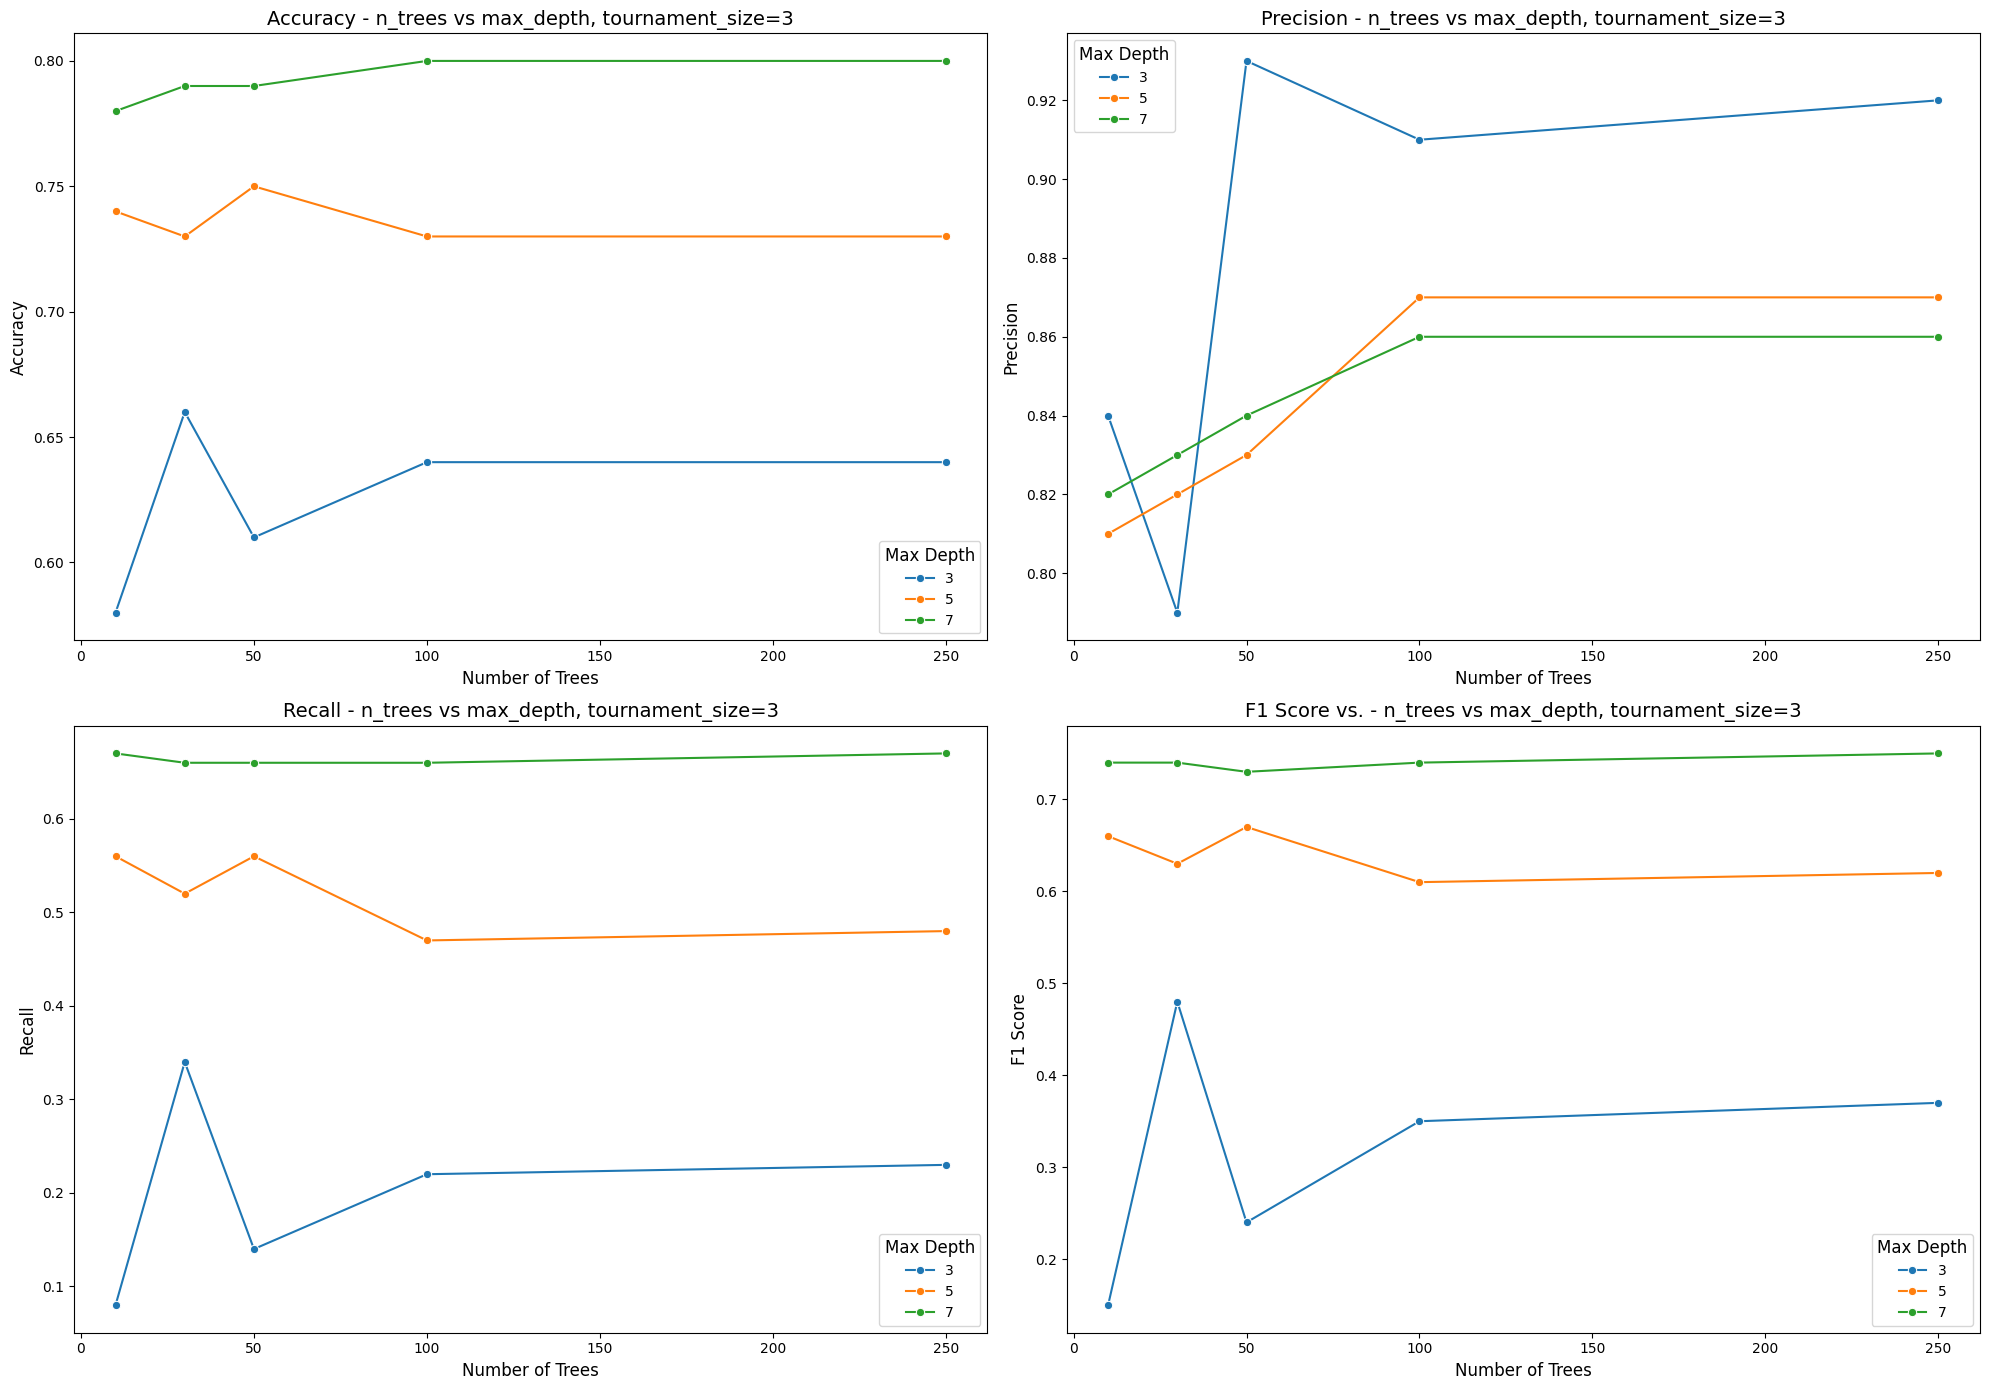

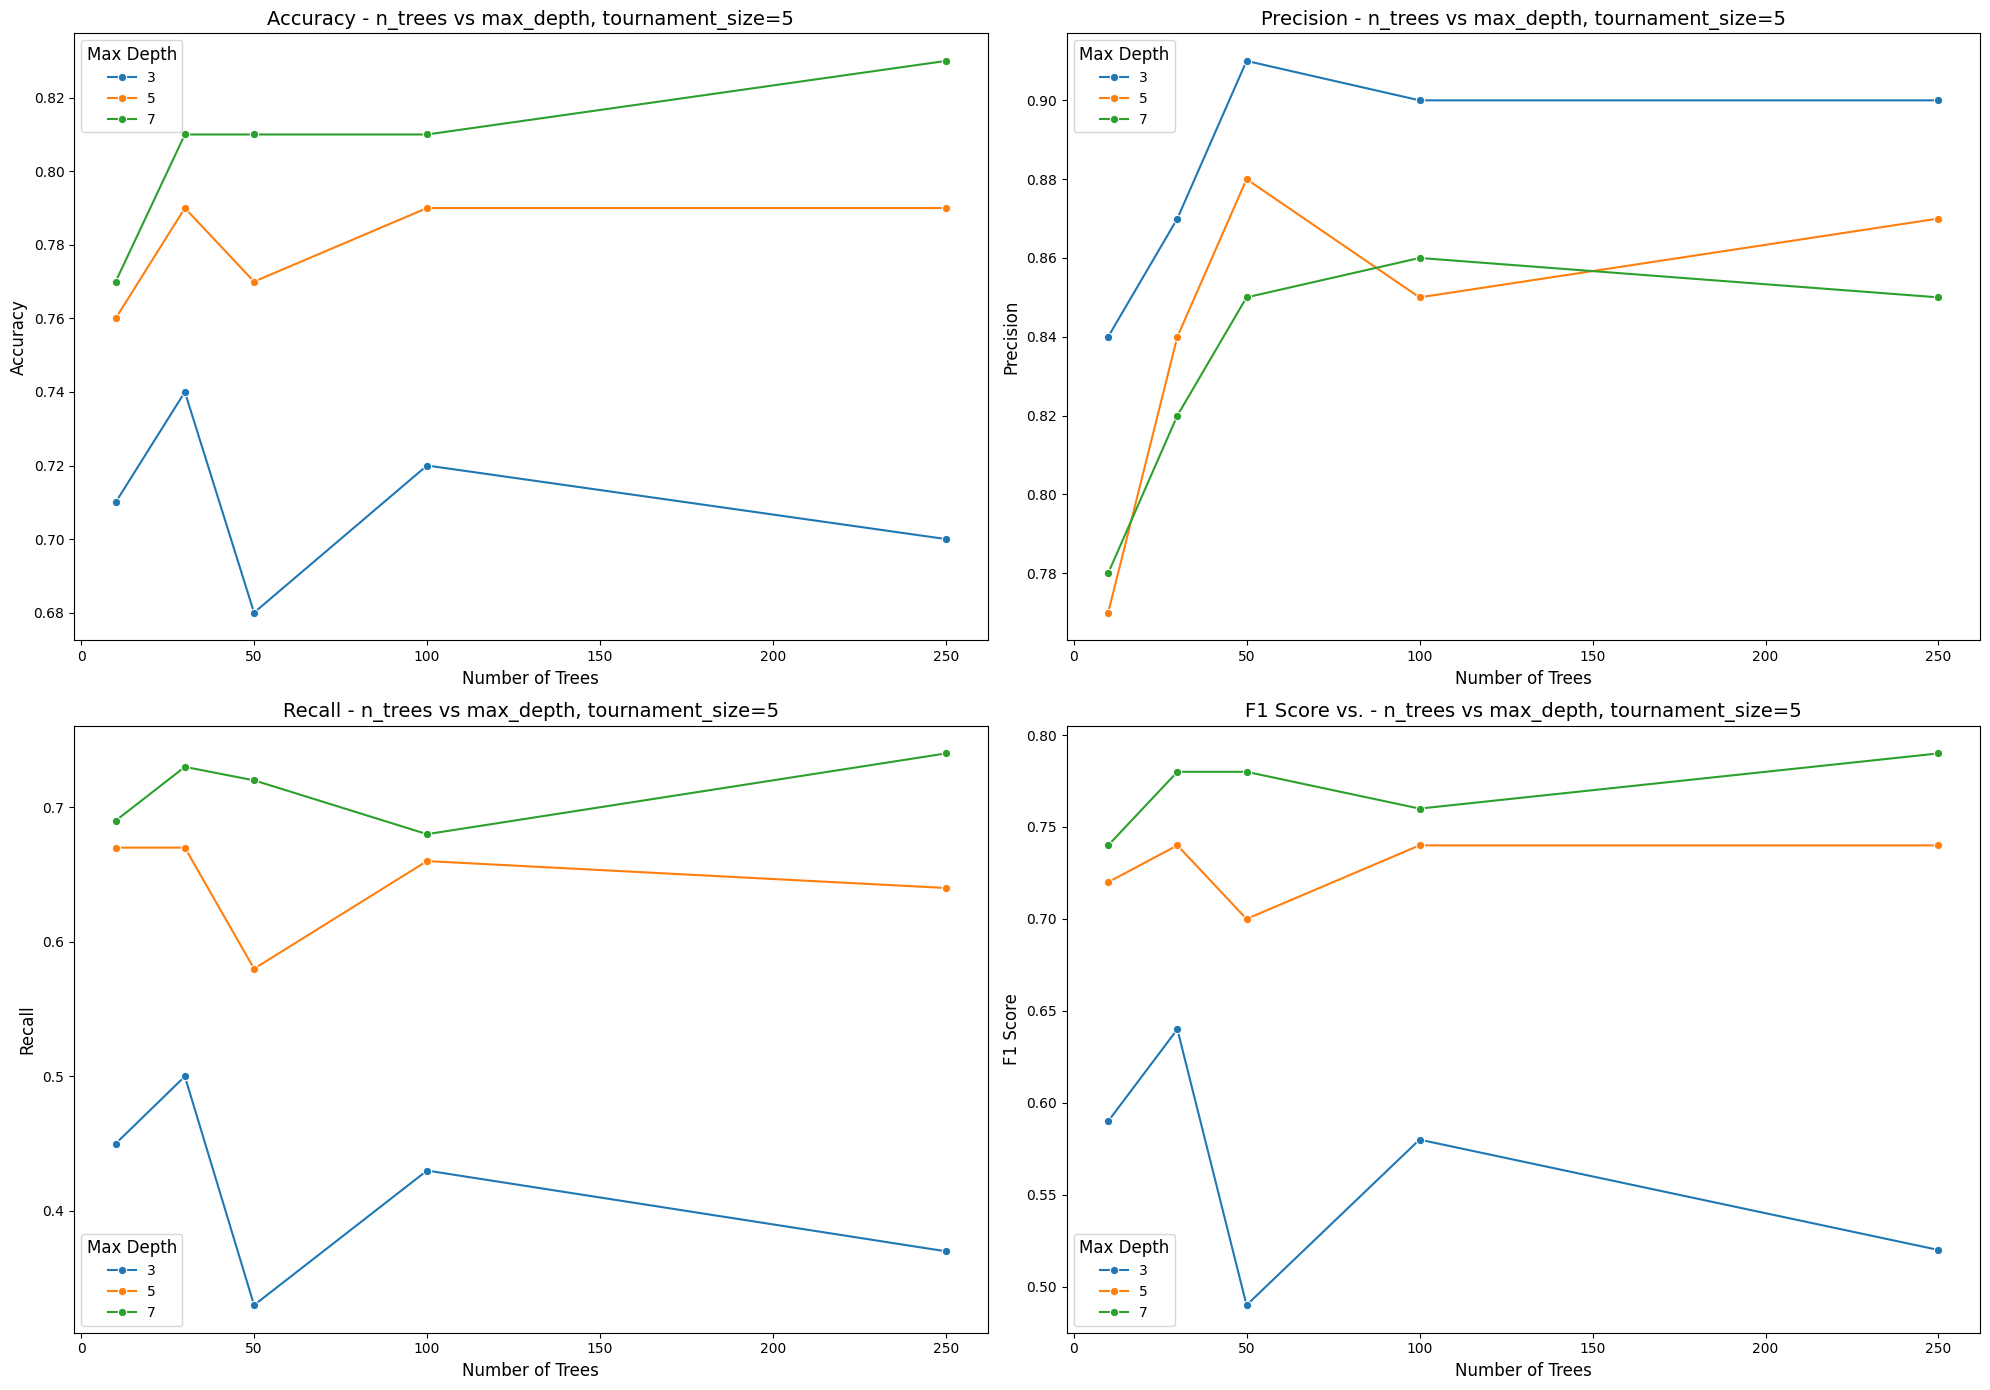

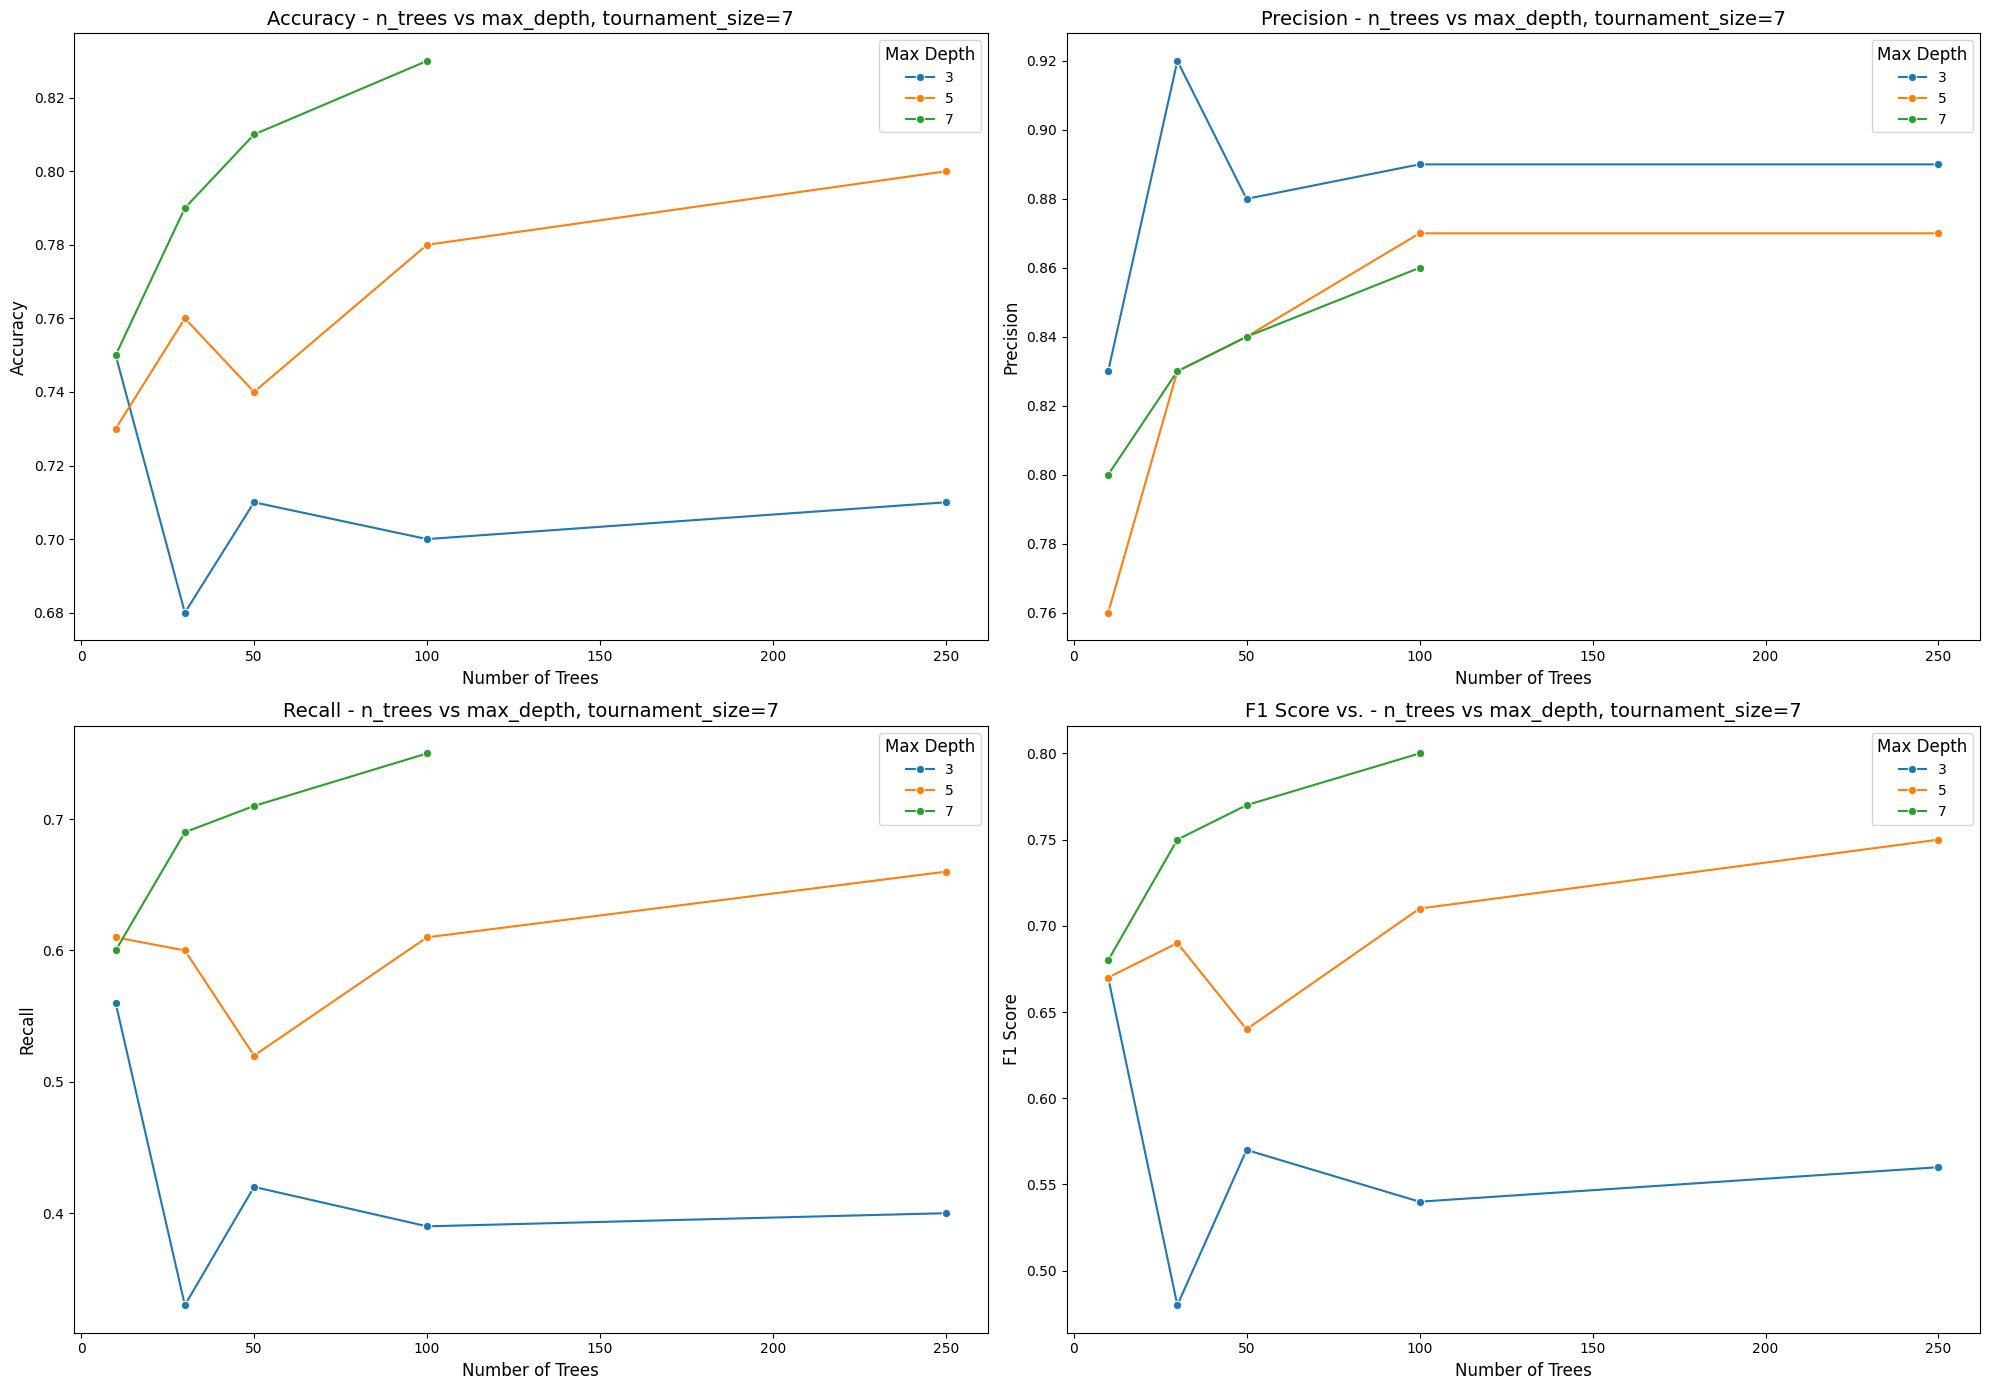

In [13]:
for tournament in tournament_sizes:
    tournament_df = df[df["tournament_size"] == tournament].round(2)
    # Create the figure and axes with a larger size for better readability
    fig, axes = plt.subplots(2, 2, figsize=(20, 14))

    # Accuracy plot
    sns.lineplot(ax=axes[0, 0], data=tournament_df, x='n_trees', y='accuracy', hue='max_depth', marker='o', palette='tab10')
    axes[0, 0].set_title(f'Accuracy - n_trees vs max_depth, tournament_size={tournament}', fontsize=14)
    axes[0, 0].set_xlabel('Number of Trees', fontsize=12)
    axes[0, 0].set_ylabel('Accuracy', fontsize=12)
    axes[0, 0].legend(title='Max Depth', fontsize=10, title_fontsize=12)

    # Precision plot
    sns.lineplot(ax=axes[0, 1], data=tournament_df, x='n_trees', y='precision', hue='max_depth', marker='o', palette='tab10')
    axes[0, 1].set_title(f'Precision - n_trees vs max_depth, tournament_size={tournament}', fontsize=14)
    axes[0, 1].set_xlabel('Number of Trees', fontsize=12)
    axes[0, 1].set_ylabel('Precision', fontsize=12)
    axes[0, 1].legend(title='Max Depth', fontsize=10, title_fontsize=12)

    # Recall plot
    sns.lineplot(ax=axes[1, 0], data=tournament_df, x='n_trees', y='recall', hue='max_depth', marker='o', palette='tab10')
    axes[1, 0].set_title(f'Recall - n_trees vs max_depth, tournament_size={tournament}', fontsize=14)
    axes[1, 0].set_xlabel('Number of Trees', fontsize=12)
    axes[1, 0].set_ylabel('Recall', fontsize=12)
    axes[1, 0].legend(title='Max Depth', fontsize=10, title_fontsize=12)

    # F1 Score plot
    sns.lineplot(ax=axes[1, 1], data=tournament_df, x='n_trees', y='f1', hue='max_depth', marker='o', palette='tab10')
    axes[1, 1].set_title(f'F1 Score vs. - n_trees vs max_depth, tournament_size={tournament}', fontsize=14)
    axes[1, 1].set_xlabel('Number of Trees', fontsize=12)
    axes[1, 1].set_ylabel('F1 Score', fontsize=12)
    axes[1, 1].legend(title='Max Depth', fontsize=10, title_fontsize=12)

    plt.savefig(f"../out/airline_cs/tournament_{tournament}.png")
    plt.tight_layout()